In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [120]:
sns.set_palette('husl')

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [32]:
pd.set_option('display.max_columns', None)

Датасет про дома в Калифорнии    
longitude	- широта     
latitude	- долгота    
housing_median_age	- средний возраст домов в квартале    
total_rooms	- кол-во комнат    
total_bedrooms	- кол-во спален    
population	- кол-во жителей в квартале    
households	- кол-во семей в квартале    
median_income	- средний доход    
median_house_value	- средняя цена дома в квартале
ocean_proximity - близость к океану     

In [73]:
df = pd.read_csv('./houses/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [129]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [130]:
df.isnull().sum().sum()

0

In [131]:
df.dropna(axis=1, how='any', inplace=True)

In [132]:
df.duplicated().sum()


0

In [133]:
lb = LabelEncoder()
df['ocean_proximity'] = lb.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,3


In [134]:
print(df['ocean_proximity'].unique())

[3 0 1 4 2]


In [135]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

# K-means

In [136]:
estimators = [
    ("k_means_shrooms_8", KMeans(n_clusters=8)),
    ("k_means_shrooms_3", KMeans(n_clusters=3)),
    ("k_means_shrooms_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]

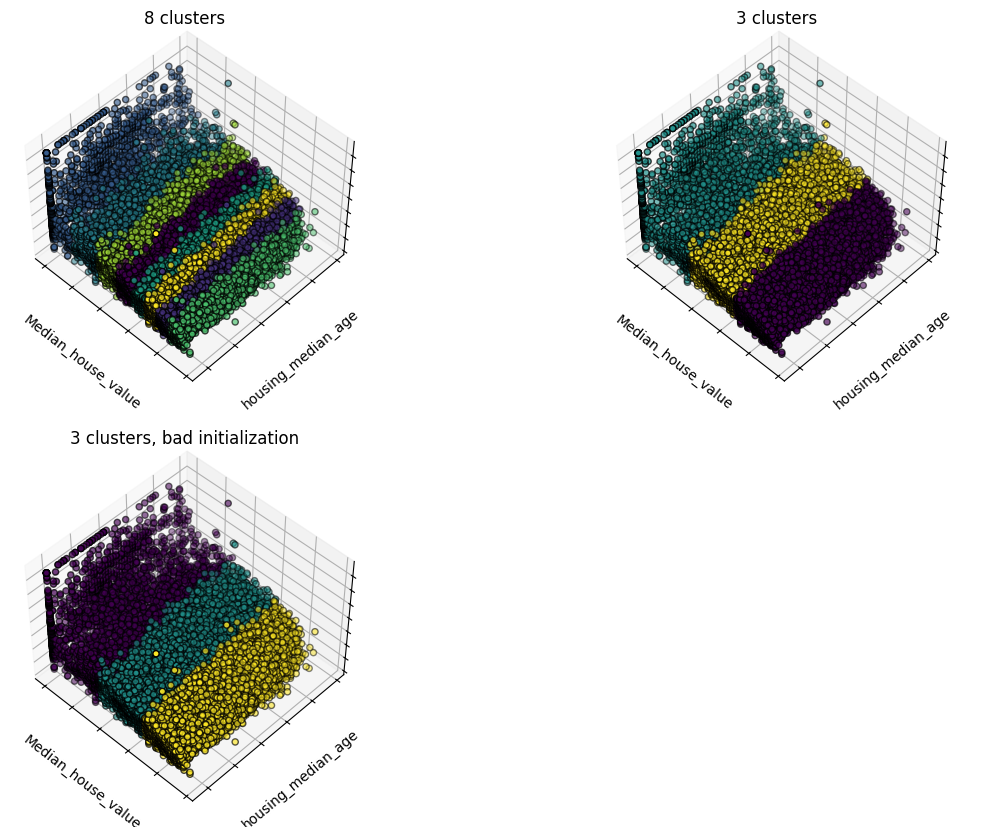

In [166]:
fig = plt.figure(figsize=(14, 10))
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(df)
    labels = est.labels_
    ax.scatter(df['median_house_value'], df['housing_median_age'], df['median_income'], c=labels.astype(float), edgecolor="k")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Median_house_value")
    ax.set_ylabel("housing_median_age")
    ax.set_zlabel("median_income")
    ax.set_title(title)

#ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)
#ax.scatter(X["latitude"], X["longitude"], X["median_house_value"], c='gray', edgecolor="k")

In [117]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0,[]]
silhouette_score_values = []
adjusted_rand_score_values = []

for n in n_clusters:
    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    if score1 < best_metric[1]:
          best_metric[1] = score1
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


In [118]:
print(f"Лучшее количество кластеров: {best_metric[0]}")
print(f"Координаты центров кластеров: {best_metric[3]}")

Лучшее количество кластеров: 14
Координаты центров кластеров: [[-8.80506848e-01  1.12967912e+00  7.13604998e-01 -4.57789525e-01
  -4.65781721e-01 -4.64234173e-01 -6.06409960e-01 -7.70857402e-01
  -2.72647457e-01]
 [ 7.08733784e-01 -6.71532750e-01  7.23330307e-01 -5.24752085e-01
  -2.18756213e-01 -4.22554067e-01 -6.98383036e-01 -6.61866016e-01
  -6.08034839e-01]
 [ 6.66242832e-01 -7.60933926e-01  6.98410053e-01 -3.72389516e-01
  -4.23963095e-01 -3.92608772e-01  2.92065157e-01  5.72088328e-01
  -7.69349416e-01]
 [-1.32113779e+00  9.19638628e-01  7.30982895e-01 -5.24942330e-02
  -3.18430902e-01 -1.51224026e-01  8.93871171e-01  1.62487519e+00
   1.33844302e+00]
 [ 4.03565336e-01 -3.63329269e-01 -1.03373822e+00  2.58829129e+00
   2.47818714e+00  2.64526559e+00  2.46670638e-01  1.11009927e-01
  -1.79910999e-01]
 [ 8.41145075e-01 -1.07976589e+00 -5.01821284e-02 -1.77812146e-01
  -1.42740708e-01 -8.27698829e-02 -2.24902526e-01  5.13552373e-02
   1.99500282e+00]
 [ 3.03033077e-01 -2.47119031e-0

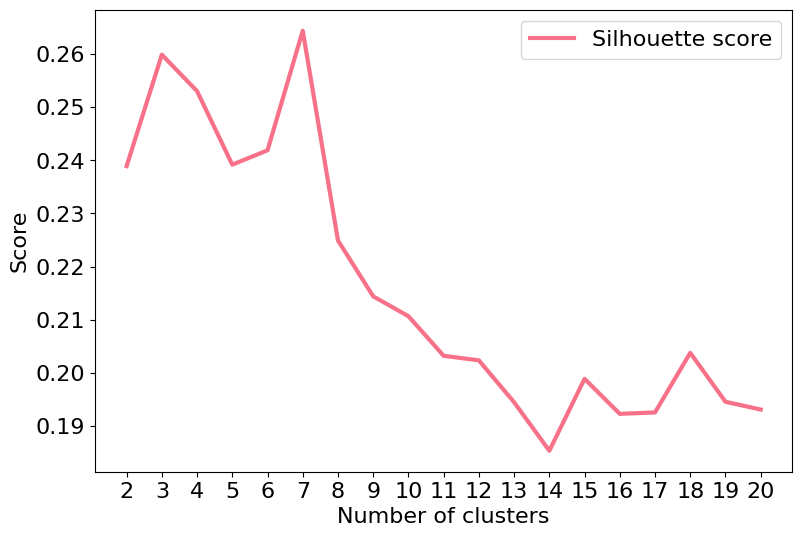

In [143]:
# Визуализация метрик
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.show()

# Иерархическая кластеризация

In [144]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [158]:
samples = df.sample(500)
mergings = linkage(samples, method='ward')

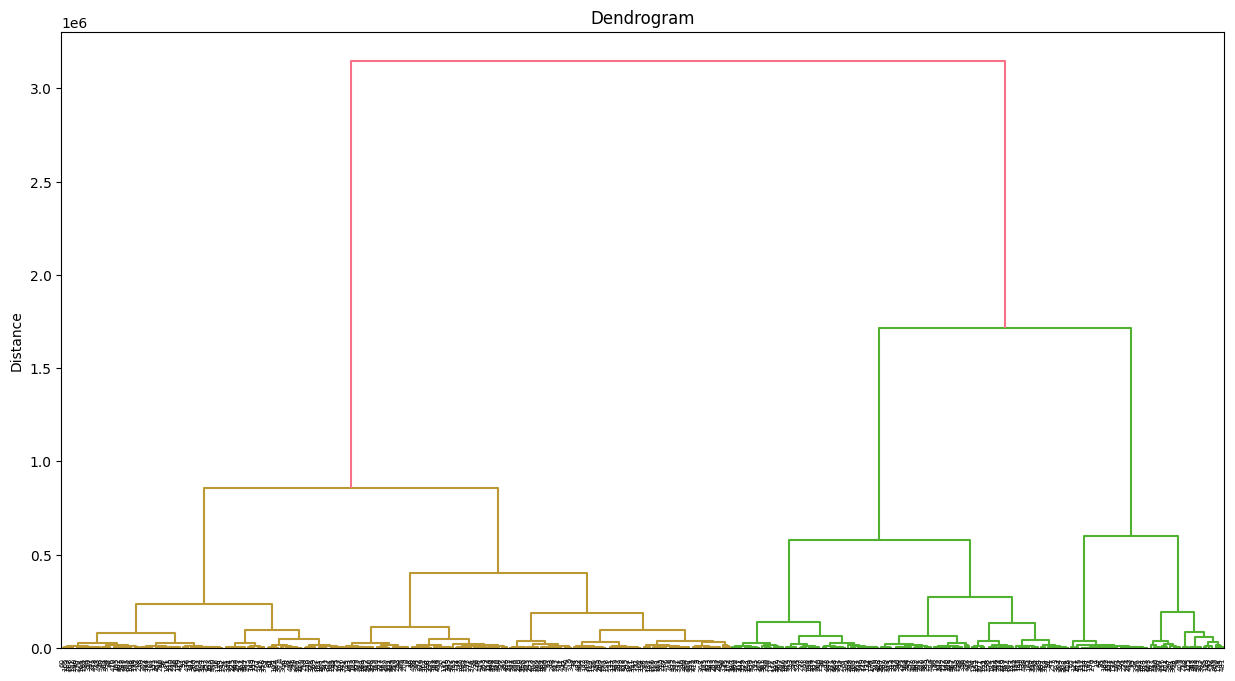

In [159]:
plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=5)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.show()

# DBSCAN

In [167]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [261]:
X_ = df[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']]
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X_), index = X_.index, columns=X_.columns)

In [258]:
mins = X.shape[1]

In [262]:
db = DBSCAN(eps=0.5, min_samples=12).fit(X_scaled)

In [264]:
labels = db.labels_
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

['y', 'b', 'g', 'r']


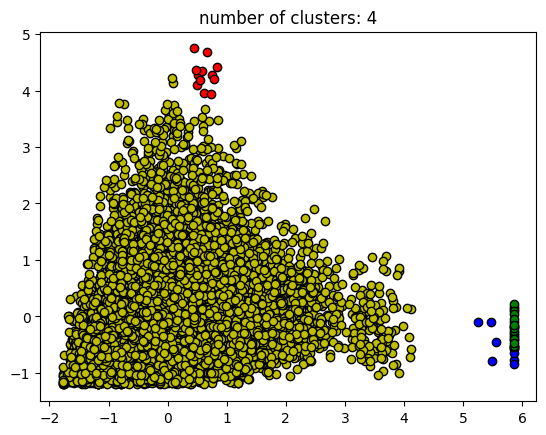

In [265]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
  if k == -1:
    col = 'k'
  class_member_mask = (labels == k)

  xy = X_scaled[class_member_mask & core_samples_mask]
  plt.plot(xy["median_income"], xy["total_rooms"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

  xy = X_scaled[class_member_mask & ~core_samples_mask]
  plt.plot(xy["median_income"], xy["total_rooms"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

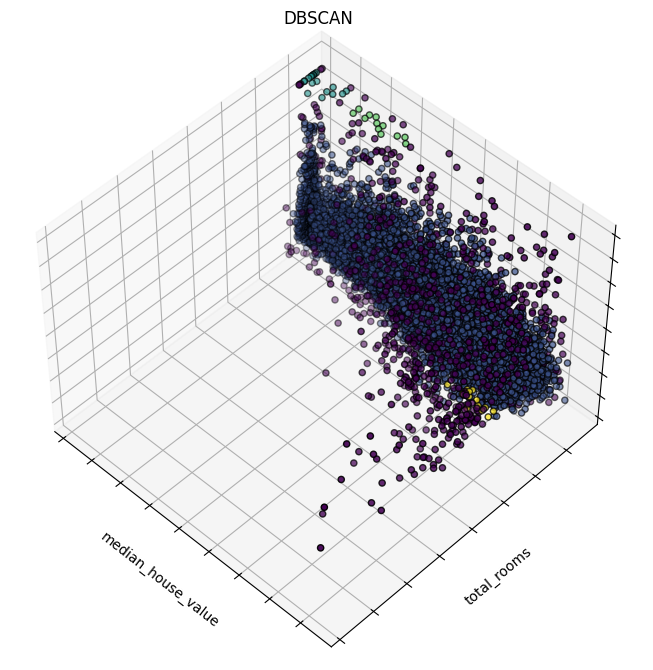

In [268]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X_scaled["housing_median_age"], X_scaled["total_rooms"], X_scaled["median_income"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("median_house_value")
ax.set_ylabel("total_rooms")
ax.set_zlabel("median_income")
ax.set_title("DBSCAN")

plt.show()

In [269]:
# evaluation metrics
sc = metrics.silhouette_score(X_scaled, labels)
print("Silhouette Coefficient:%0.2f" % sc)
#ari = adjusted_rand_score(y, labels)
#print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.44
